In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

In [3]:
output_features_def1 = np.load("output_features_def1-1000PBF.npy")
input_data1 = np.load("input_data1-1000PBF.npy")
output_features_def2 = np.load("output_features_def1001-2000PBF.npy")
input_data2 = np.load("input_data1001-2000PBF.npy")
output_features_def3 = np.load("output_features_def2001-3000PBF.npy")
input_data3 = np.load("input_data2001-3000PBF.npy")
output_features_def4 = np.load("output_features_def4001-5000PBF.npy")
input_data4 = np.load("input_data4001-5000PBF.npy")
output_features_def5 = np.load("output_features_def5001-6000PBF.npy")
input_data5 = np.load("input_data5001-6000PBF.npy")
output_features_def6 = np.load("output_features_def400-1000PBF_sc2.npy")
input_data6 = np.load("input_data400-1000PBF_sc2.npy")
output_features_def7 = np.load("output_features_def1001-2000PBF_sc2.npy")
input_data7 = np.load("input_data1001-2000PBF_sc2.npy")
output_features_def8 = np.load("output_features_def2001-3000PBF_sc2.npy")
input_data8 = np.load("input_data2001-3000PBF_sc2.npy")
output_features_test = np.load("output_features_def3001-4000PBF.npy")
input_data_test = np.load("input_data3001-4000PBF.npy")
input_data = np.concatenate([input_data1, input_data2, input_data3, input_data4, input_data5, input_data6, input_data7, input_data8])
output_features = np.concatenate([output_features_def1,output_features_def2, output_features_def3, output_features_def4, output_features_def5, output_features_def6, output_features_def7, output_features_def8])

#for j in range(len(input_data)):
#    for i in range(12):
#        input_data[j, 36*i:36*(i+1)] = input_data[j, 36*i:36*(i+1)].max()

#input_data[:, 72:432] = 1

print(input_data.shape)
print(output_features.shape)

(7419, 452)
(7419, 17)


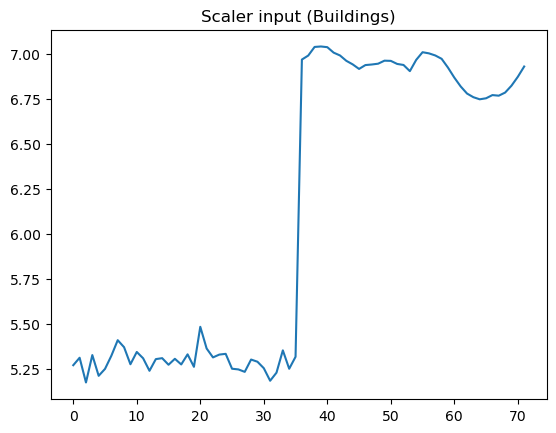

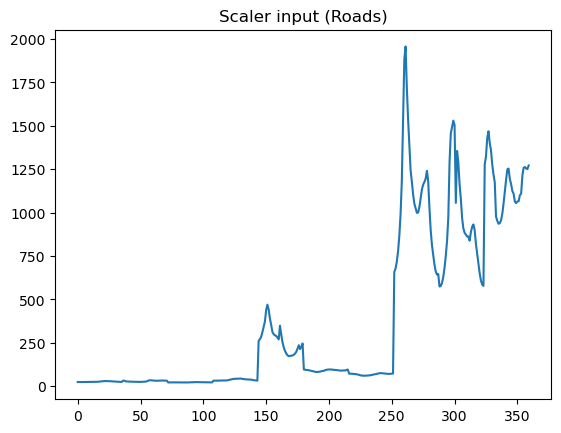

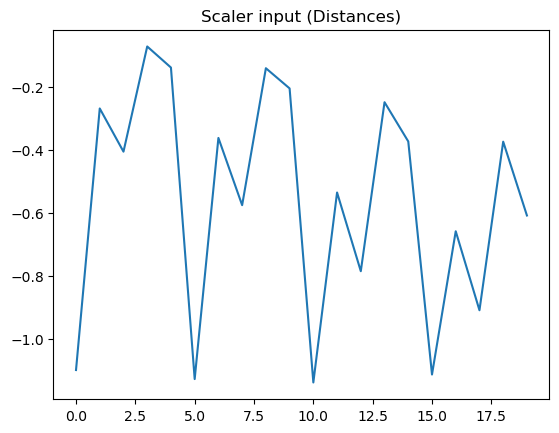

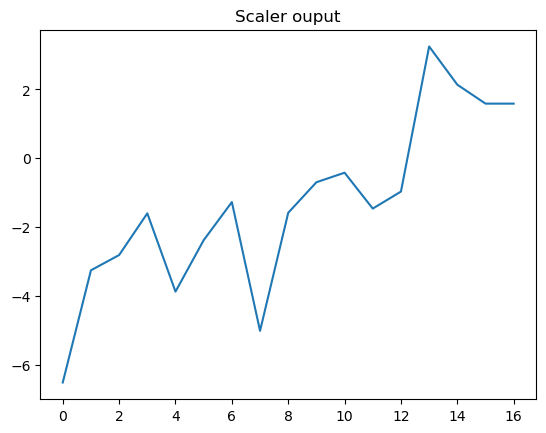

In [4]:
#DEFINE SCALERS
#inputscaler = MinMaxScaler(feature_range=(0, 1))
#outputscaler = MinMaxScaler()
inputscaler = StandardScaler()
outputscaler = StandardScaler()

inputscaler.fit(input_data)
outputscaler.fit(output_features)

#TEST
test = np.ones((100, 452))
test_input = inputscaler.transform(test)
test = np.ones((100, 17))
test_output = outputscaler.transform(test)

plt.plot(test_input[0][:72])
plt.title("Scaler input (Buildings)")
plt.show()

plt.plot(test_input[0][72:432])
plt.title("Scaler input (Roads)")
plt.show()

plt.plot(test_input[0][432:])
plt.title("Scaler input (Distances)")
plt.show()

plt.plot(test_output[0])
plt.title("Scaler ouput")
plt.show()


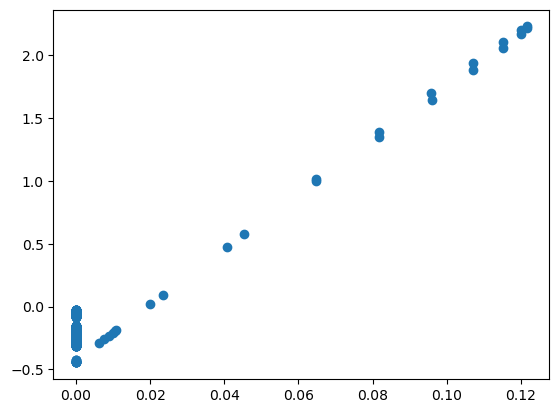

In [14]:
#second test
which_one = [1033, 1034, 1035]
raw_input = input_data[which_one,:]
raw_output = output_features[which_one,:]
scaled_input = inputscaler.transform(raw_input)
scaled_output = outputscaler.transform(raw_output)

plt.plot(raw_input[2,72:432],scaled_input[2,72:432],'o')
plt.show()

In [15]:
pickle.dump(inputscaler, open("CustomInputScalerPBF2.pkl", 'wb'))
pickle.dump(outputscaler, open("CustomOutputScalerPBF2.pkl", 'wb'))

In [35]:
# try a more clever scaler with mean and stdev on each group of features
# reorganise the data such that all features of the same type are grouped
# refer to the document ML_input_indicator_range.xlsx on sharepoint for range definitions
Nsamples = input_data.shape[0]
input_data_reordered = []
#building densities
input_data_reordered.append(np.reshape(input_data[:,0:36],(36*Nsamples,)))
#distances within 200m
input_data_reordered.append(np.reshape(input_data[:,36:432],(((432-36)*Nsamples,))))
#building density
input_data_reordered.append(input_data[:,432])
#road length
input_data_reordered.append(np.reshape(input_data[:,433:437],(((437-433)*Nsamples,))))
#building density
input_data_reordered.append(input_data[:,437])
#road length
input_data_reordered.append(np.reshape(input_data[:,438:442],(((442-438)*Nsamples,))))
#building density
input_data_reordered.append(input_data[:,442])
#road length
input_data_reordered.append(np.reshape(input_data[:,443:447],(((447-443)*Nsamples,))))
#building density
input_data_reordered.append(input_data[:,447])
#road length
input_data_reordered.append(np.reshape(input_data[:,448:452],(((452-448)*Nsamples,))))

# now create separate scalers for each group
inputscalers = []
for input_d in range(0,len(input_data_reordered)): 
    inputscalers.append(StandardScaler())
    inputscalers[input_d].fit(input_data_reordered[input_d].reshape(-1,1))


In [55]:
# try a more clever scaler with mean and stdev on each group of features
# reorganise the data such that all features of the same type are grouped
# refer to the document ML_input_indicator_range.xlsx on sharepoint for range definitions

class GroupScaler:
    def __init__(self):
        self.inputscalers = []
    
    def fit(self, samples): 
        Nsamples = samples.shape[0]
        samples_reordered = []
        #building densities
        samples_reordered.append(np.reshape(samples[:,0:36],(36*Nsamples,)))
        #distances within 200m
        samples_reordered.append(np.reshape(samples[:,36:432],(((432-36)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,432])
        #road length
        samples_reordered.append(np.reshape(samples[:,433:437],(((437-433)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,437])
        #road length
        samples_reordered.append(np.reshape(samples[:,438:442],(((442-438)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,442])
        #road length
        samples_reordered.append(np.reshape(samples[:,443:447],(((447-443)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,447])
        #road length
        samples_reordered.append(np.reshape(samples[:,448:452],(((452-448)*Nsamples,))))

        # now create separate scalers for each group
        for input_d in range(0,len(samples_reordered)): 
            self.inputscalers.append(StandardScaler(with_mean=False))
            self.inputscalers[input_d].fit(samples_reordered[input_d].reshape(-1,1))
    
    def transform(self, samples):
        Nsamples = samples.shape[0]
        samples_reordered = []
        #building densities
        samples_reordered.append(np.reshape(samples[:,0:36],(36*Nsamples,)))
        #distances within 200m
        samples_reordered.append(np.reshape(samples[:,36:432],(((432-36)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,432])
        #road length
        samples_reordered.append(np.reshape(samples[:,433:437],(((437-433)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,437])
        #road length
        samples_reordered.append(np.reshape(samples[:,438:442],(((442-438)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,442])
        #road length
        samples_reordered.append(np.reshape(samples[:,443:447],(((447-443)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,447])
        #road length
        samples_reordered.append(np.reshape(samples[:,448:452],(((452-448)*Nsamples,))))

        # now apply separate scalers for each group
        scaled_reordered = []
        for input_d in range(0,len(samples_reordered)): 
            scaled_reordered.append(self.inputscalers[input_d].transform(samples_reordered[input_d].reshape(-1,1)))
        
        # restore original sample
        scaled = np.zeros((Nsamples,452))
        #building densities
        scaled[:,0:36] = np.reshape(scaled_reordered[0],(Nsamples,36))
        #distances within 200m
        scaled[:,36:432] = np.reshape(scaled_reordered[1],(Nsamples,(432-36)))
        #building density
        scaled[:,432] = scaled_reordered[2].reshape(-1,)
        #road length
        scaled[:,433:437] = np.reshape(scaled_reordered[3],(Nsamples,(437-433)))
        #building density
        scaled[:,437] = scaled_reordered[4].reshape(-1,)
        #road length
        scaled[:,438:442] = np.reshape(scaled_reordered[5],(Nsamples,(442-438)))
        #building density
        scaled[:,442] = scaled_reordered[6].reshape(-1,)
        #road length
        scaled[:,443:447] = np.reshape(scaled_reordered[7],(Nsamples,(447-443)))
        #building density
        scaled[:,447] = scaled_reordered[8].reshape(-1,)
        #road length
        scaled[:,448:452] = np.reshape(scaled_reordered[9],(Nsamples,(452-448)))
        
        return scaled
    
    def inverse_transform(self, samples):
        Nsamples = samples.shape[0]
        samples_reordered = []
        #building densities
        samples_reordered.append(np.reshape(samples[:,0:36],(36*Nsamples,)))
        #distances within 200m
        samples_reordered.append(np.reshape(samples[:,36:432],(((432-36)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,432])
        #road length
        samples_reordered.append(np.reshape(samples[:,433:437],(((437-433)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,437])
        #road length
        samples_reordered.append(np.reshape(samples[:,438:442],(((442-438)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,442])
        #road length
        samples_reordered.append(np.reshape(samples[:,443:447],(((447-443)*Nsamples,))))
        #building density
        samples_reordered.append(samples[:,447])
        #road length
        samples_reordered.append(np.reshape(samples[:,448:452],(((452-448)*Nsamples,))))

        # now apply separate scalers for each group
        scaled_reordered = []
        for input_d in range(0,len(samples_reordered)): 
            scaled_reordered.append(self.inputscalers[input_d].inverse_transform(samples_reordered[input_d].reshape(-1,1)))
        
        # restore original sample
        scaled = np.zeros((Nsamples,452))
        #building densities
        scaled[:,0:36] = np.reshape(scaled_reordered[0],(Nsamples,36))
        #distances within 200m
        scaled[:,36:432] = np.reshape(scaled_reordered[1],(Nsamples,(432-36)))
        #building density
        scaled[:,432] = scaled_reordered[2].reshape(-1,)
        #road length
        scaled[:,433:437] = np.reshape(scaled_reordered[3],(Nsamples,(437-433)))
        #building density
        scaled[:,437] = scaled_reordered[4].reshape(-1,)
        #road length
        scaled[:,438:442] = np.reshape(scaled_reordered[5],(Nsamples,(442-438)))
        #building density
        scaled[:,442] = scaled_reordered[6].reshape(-1,)
        #road length
        scaled[:,443:447] = np.reshape(scaled_reordered[7],(Nsamples,(447-443)))
        #building density
        scaled[:,447] = scaled_reordered[8].reshape(-1,)
        #road length
        scaled[:,448:452] = np.reshape(scaled_reordered[9],(Nsamples,(452-448)))
        
        return scaled

    

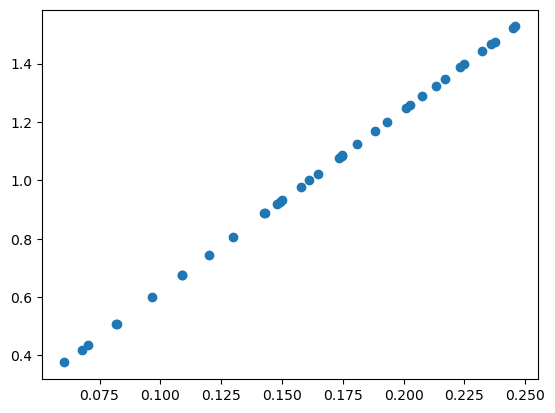

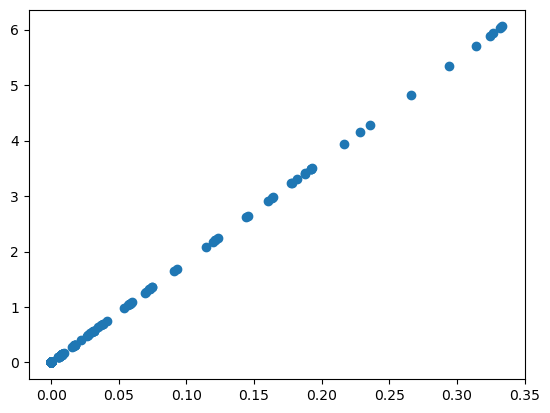

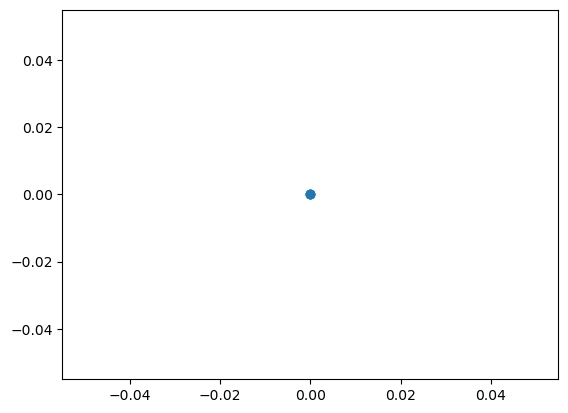

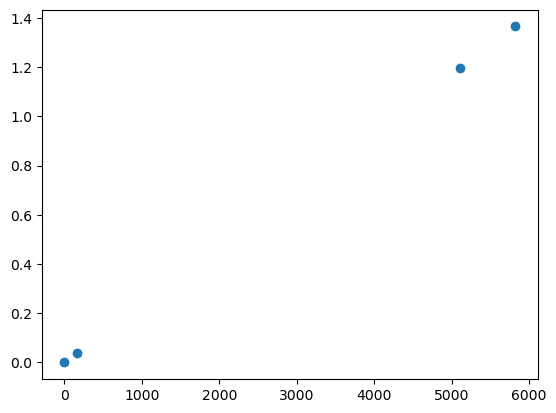

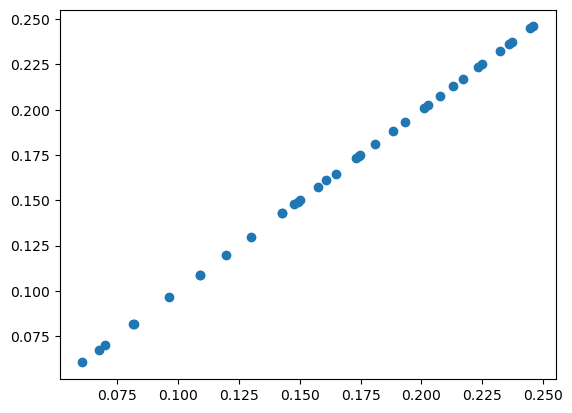

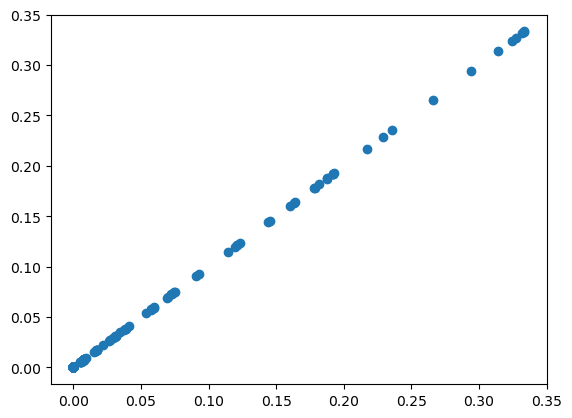

In [56]:
# test GroupScaler
inputgs = GroupScaler()

inputgs.fit(input_data)

which_one = [1032, 1033, 1034, 1035]
raw_input = input_data[which_one,:]

scaled_input = inputgs.transform(raw_input)

plt.plot(raw_input[2,0:36],scaled_input[2,0:36],'o')
plt.show()

plt.plot(raw_input[2,36:432],scaled_input[2,36:432],'o')
plt.show()

plt.plot(raw_input[2,433:437],scaled_input[2,433:437],'o')
plt.show()

plt.plot(raw_input[2,448:452],scaled_input[2,448:452],'o')
plt.show()

unscaled_input = inputgs.inverse_transform(scaled_input)

plt.plot(raw_input[2,0:36],unscaled_input[2,0:36],'o')
plt.show()

plt.plot(raw_input[2,36:432],unscaled_input[2,36:432],'o')
plt.show()



In [57]:
pickle.dump(inputgs, open("CustomGroupInputScaler.pkl", 'wb'))